In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file = pd.read_csv('/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv', na_values='?')
file
df = file

In [3]:
file.isnull()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
file.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
file.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
import matplotlib.pyplot as plt

In [7]:
file['Semester'].value_counts()

Semester
F    245
S    235
Name: count, dtype: int64

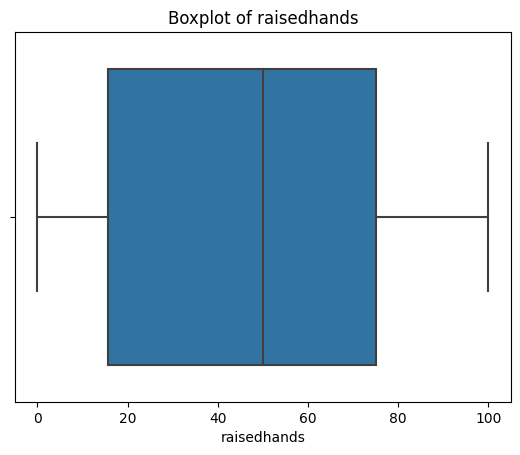

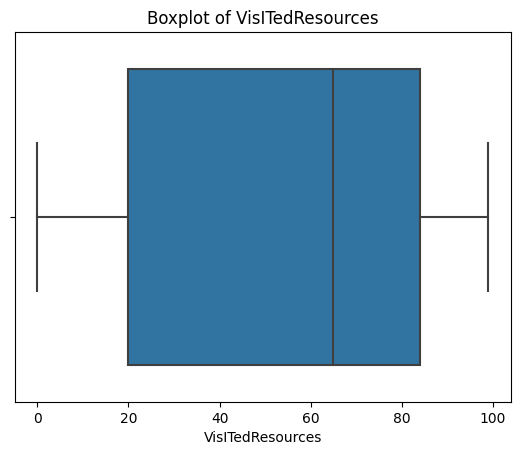

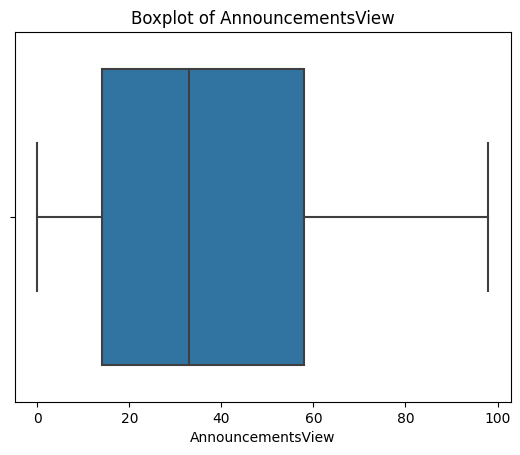

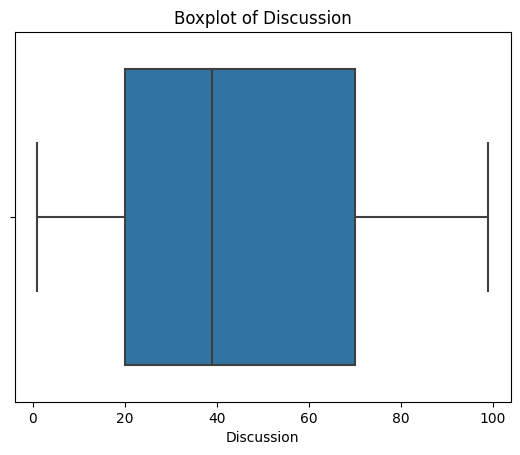

In [8]:
numeric_vars = file.select_dtypes(include='number').columns.tolist()
for col in numeric_vars:
    sns.boxplot(x=file[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [9]:
file['VisITedResources_log'] = np.log(file['VisITedResources'] + 1)
df['raisedhands_sqrt'] = np.sqrt(df['raisedhands'])
from scipy.stats import boxcox
df['AnnouncementsView_boxcox'], _ = boxcox(df['AnnouncementsView'] + 1)
df['Discussion_exp'] = np.exp(df['Discussion'])

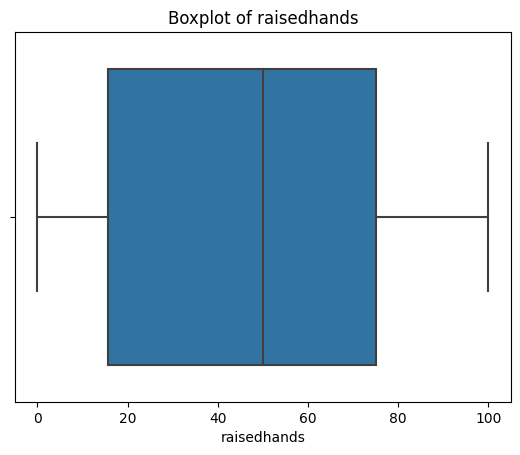

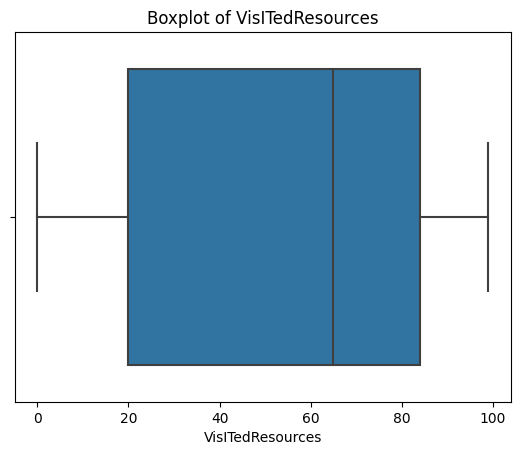

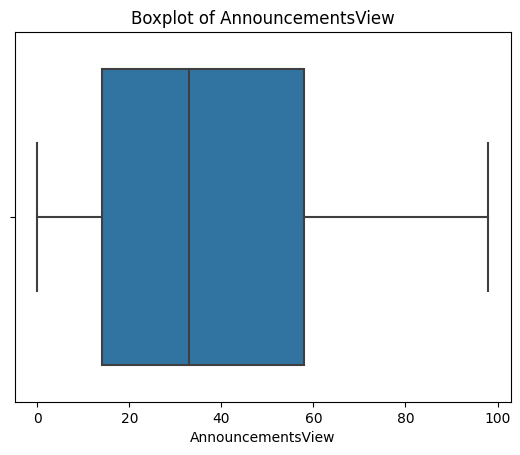

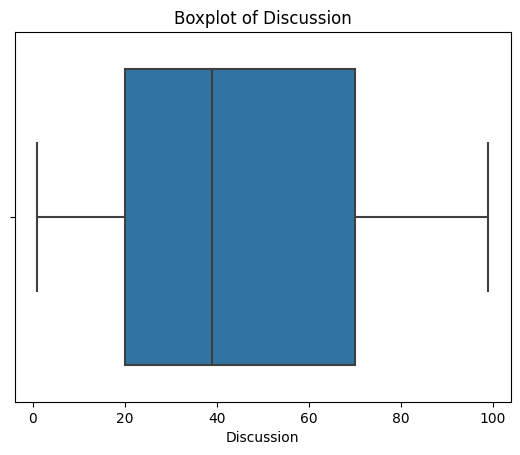

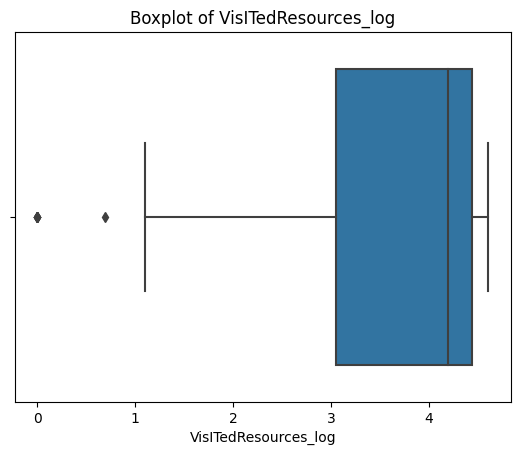

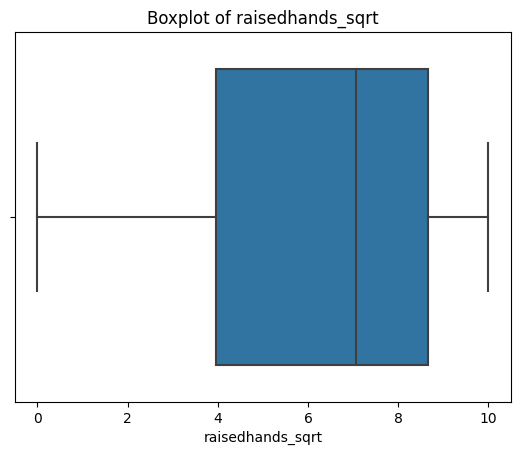

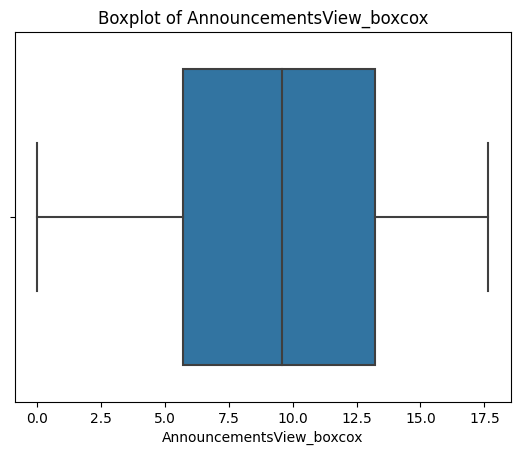

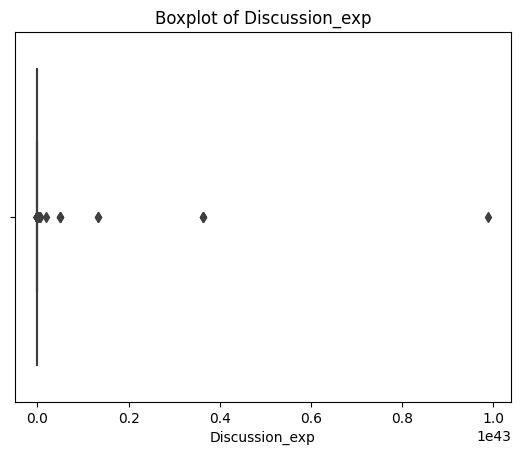

In [10]:
numeric_vars = file.select_dtypes(include='number').columns.tolist()
for col in numeric_vars:
    sns.boxplot(x=file[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
file['raisedhands'] = file['raisedhands'] / file['raisedhands'].max()
file['VisITedResources']= file['VisITedResources'] / file['VisITedResources'].max()
file.StudentAbsenceDays.replace({"Under-7":0,"Above-7":1})

/tmp/ipykernel_18/2568870357.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file.StudentAbsenceDays.replace({"Under-7":0,"Above-7":1})


0      0
1      0
2      1
3      1
4      1
      ..
475    1
476    0
477    0
478    1
479    1
Name: StudentAbsenceDays, Length: 480, dtype: int64

# Binning

In [12]:
min_val = file['Discussion'].min()
max_val = file['Discussion'].max()
print(min_val)
print(max_val)

1
99


In [13]:
bins = np.linspace(min_val,max_val,4)
bins

array([ 1.        , 33.66666667, 66.33333333, 99.        ])

In [14]:
labels=['small','medium','big']
file['bins']=pd.cut(file['Discussion'],bins=bins,labels=labels,include_lowest=True)

In [15]:
file['bins'].value_counts()

bins
small     221
medium    130
big       129
Name: count, dtype: int64